In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt


In [2]:
census = pd.read_csv('data/nyc.csv', dtype={'GEOID20': str})

In [3]:
gdf = gpd.read_file('nyct2020_24a/nyct2020.shp', dtype={'GEOID': str, 'BoroCT2020':str})

In [4]:
# merged_data = pd.merge(census, gdf, left_on='GEOID20', right_on='GEOID', how='right')
# merged_data.head()

In [5]:
# merged_data.columns

In [6]:
# merged_data['BoroCT2020']

In [7]:
buildings = pd.read_csv('nyc_pluto_24v1_csv/pluto_24v1_1.csv', dtype={'bct2020':str, 'bctcb2020': str, 'ct2010':str, 'cb2010':str})

C:\Users\PeiSZ\AppData\Local\Temp\ipykernel_50208\3015506718.py:1: DtypeWarning: Columns (21,22,24,26,28,65,66,81,88) have mixed types. Specify dtype option on import or set low_memory=False.
  buildings = pd.read_csv('nyc_pluto_24v1_csv/pluto_24v1_1.csv', dtype={'bct2020':str, 'bctcb2020': str, 'ct2010':str, 'cb2010':str})


In [8]:
merged_data2 = pd.merge(buildings, gdf, left_on='bct2020', right_on='BoroCT2020')

In [9]:
for i in merged_data2['ownertype'].unique():
    temp = merged_data2[merged_data2['ownertype'] == i]
    ty = temp.groupby('BoroCT2020')['ownertype'].count().reset_index(name=f'ownertype_{i}')
    gdf = gdf.merge(ty, on='BoroCT2020', how='left')
    
areas = ['bldgarea','comarea','resarea','officearea','retailarea','garagearea','strgearea','factryarea','otherarea']
for i in areas:
    temp = merged_data2.groupby('BoroCT2020')[i].sum().reset_index(name=i)
    gdf = gdf.merge(temp, on='BoroCT2020', how='left')
    gdf[f'ln_{i}'] = np.log(gdf[i])
    gdf[f'ln_{i}'].replace(-np.inf, np.nan, inplace=True)

building = ['numbldgs','numfloors','unitsres','unitstotal']
for i in building:
    temp = merged_data2.groupby('BoroCT2020')[i].sum().reset_index(name=i)
    gdf = gdf.merge(temp, on='BoroCT2020', how='left')
    gdf[f'ln_{i}'] = np.log(gdf[i])
    gdf[f'ln_{i}'].replace(-np.inf, np.nan, inplace=True)

temp = merged_data2.groupby('BoroCT2020')['assessland'].mean().reset_index(name='average_assessland')
gdf = gdf.merge(temp, on='BoroCT2020', how='left')

D:\Anaconda\envs\cusp7033\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\PeiSZ\AppData\Local\Temp\ipykernel_50208\1853920566.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gdf[f'ln_{i}'].replace(-np.inf, np.nan, inplace=True)
D:\Anaconda\envs\cusp7033\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\P

D:\Anaconda\envs\cusp7033\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\PeiSZ\AppData\Local\Temp\ipykernel_50208\1853920566.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gdf[f'ln_{i}'].replace(-np.inf, np.nan, inplace=True)


In [10]:
merged_data = pd.merge(census, gdf, left_on='GEOID20', right_on='GEOID', how='right')
merged_gdf = gpd.GeoDataFrame(merged_data, geometry='geometry')


In [11]:
merged_data.columns

Index(['NAME', 'income', 'population', 'state', 'county', 'tract', 'GEOID20',
       'area_x', 'city', 'OBJECTID_1', 'OBJECTID', 'ALAND20', 'AWATER20',
       'INTPTLAT20', 'INTPTLON20', 'CBSA10', 'METRO_NAME', 'HRS2020', 'RHRS20',
       'Shape_Leng_x', 'Shape_Area_x', 'EQINTER20', 'area_y', 'CTLabel',
       'BoroCode', 'BoroName', 'CT2020', 'BoroCT2020', 'CDEligibil', 'NTAName',
       'NTA2020', 'CDTA2020', 'CDTANAME', 'GEOID', 'PUMA', 'Shape_Leng_y',
       'Shape_Area_y', 'geometry', 'ownertype_nan', 'ownertype_C',
       'ownertype_X', 'ownertype_O', 'ownertype_P', 'ownertype_M', 'bldgarea',
       'ln_bldgarea', 'comarea', 'ln_comarea', 'resarea', 'ln_resarea',
       'officearea', 'ln_officearea', 'retailarea', 'ln_retailarea',
       'garagearea', 'ln_garagearea', 'strgearea', 'ln_strgearea',
       'factryarea', 'ln_factryarea', 'otherarea', 'ln_otherarea', 'numbldgs',
       'ln_numbldgs', 'numfloors', 'ln_numfloors', 'unitsres', 'ln_unitsres',
       'unitstotal', 'ln_unit

In [14]:
merged_data.to_csv('data/nyc_census_building.csv', index=False)


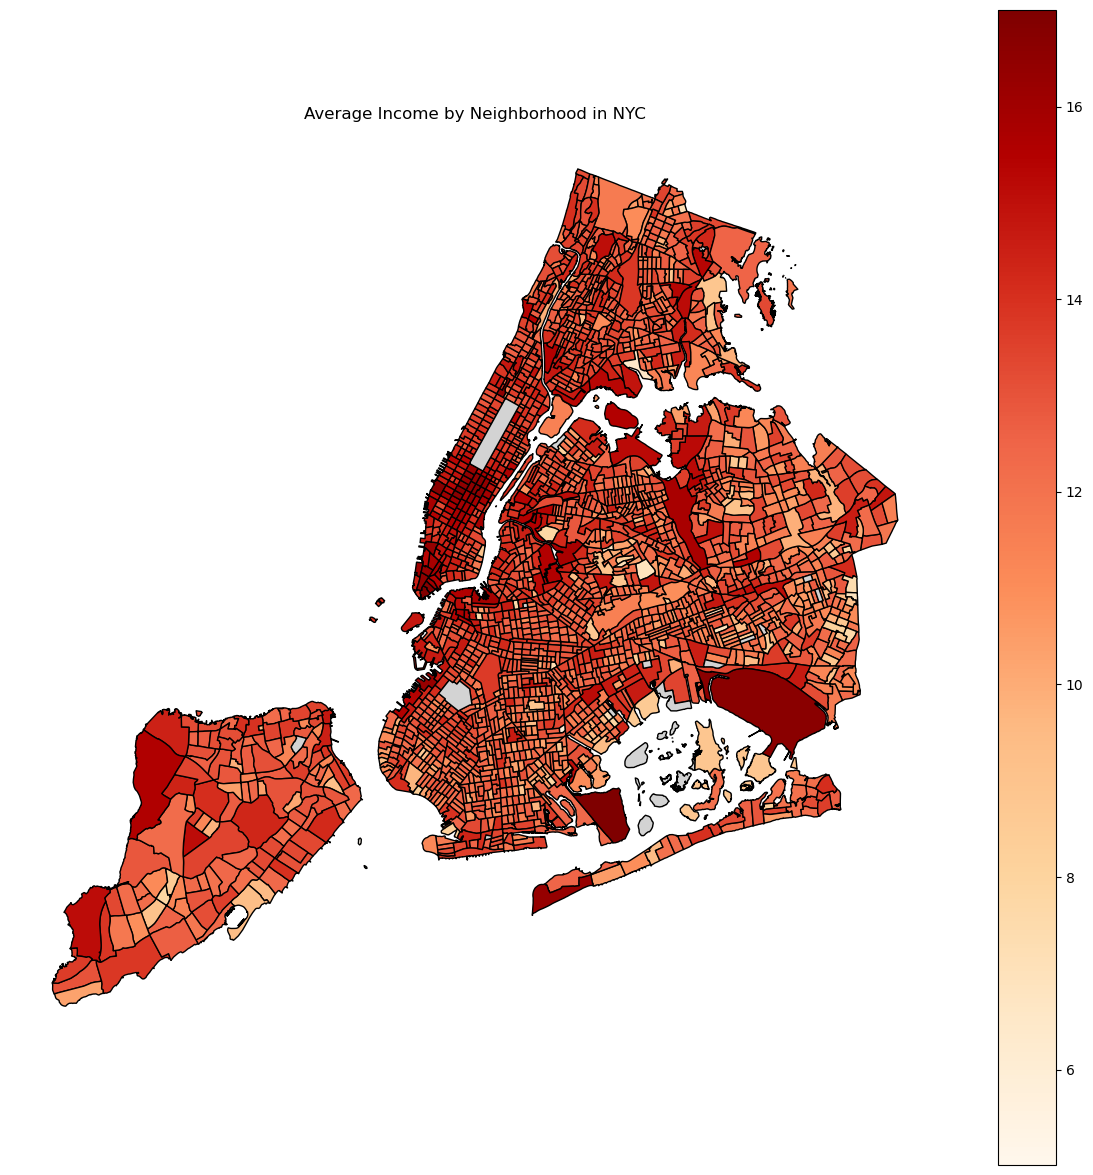

In [13]:
# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
merged_gdf.plot(ax=ax, column='ln_comarea', cmap='OrRd',legend=True,edgecolor='black', missing_kwds={'color': 'lightgrey', 'label': 'No Data'})
plt.title('Average Income by Neighborhood in NYC')
plt.axis('off')
plt.show()